In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

#reading the csv data from Data.csv
df = pd.read_csv('Data.csv')
df.set_index('loan_amnt', inplace = True)
print(df.shape)
print(df.columns)


(100896, 30)
Index(['int_rate', 'installment', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [2]:
check = df.isna().sum()
check.sum()


0

In [27]:
df.dropna(inplace=True)
print(df)

        loan_amnt  int_rate  installment grade emp_length home_ownership  \
0            2000     17.97        72.28     D    4 years       MORTGAGE   
1           12000     12.29       400.24     C  10+ years            OWN   
2           16000     19.42       589.90     D    7 years           RENT   
3           22525     16.02       548.01     C  10+ years       MORTGAGE   
4           19000     16.99       472.10     D     1 year           RENT   
...           ...       ...          ...   ...        ...            ...   
100891      11250     16.99       401.04     D  10+ years       MORTGAGE   
100892      14400     15.61       503.50     D    3 years           RENT   
100893      35000     21.85       963.68     D   < 1 year       MORTGAGE   
100894      12000      8.90       381.04     A   < 1 year            OWN   
100895      20000      8.24       628.95     B  10+ years           RENT   

        annual_inc         loan_status    dti  delinq_2yrs  ...  \
0          55400.0  

In [18]:
missing_values = df.isnull().sum()
print(missing_values)

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: i

In [5]:
df.head(3)

,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,,,,,,,,,,,,,,,,,,,,,
2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,1.0,2.0,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,0.0,0.0,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,1.0,0.0,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0


<Axes: ylabel='loan_amnt'>

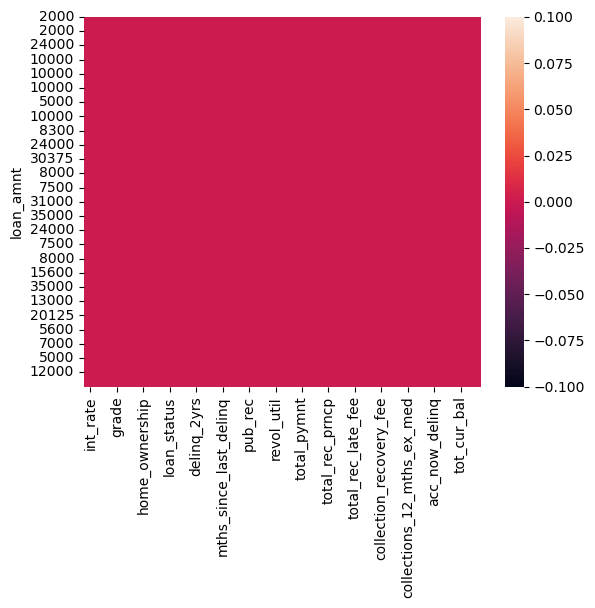

In [9]:
sb.heatmap(df.isnull())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100896 entries, 2000 to 20000
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100896 non-null  float64
 1   installment                 100896 non-null  float64
 2   grade                       100896 non-null  object 
 3   emp_length                  100896 non-null  object 
 4   home_ownership              100896 non-null  object 
 5   annual_inc                  100896 non-null  float64
 6   loan_status                 100896 non-null  object 
 7   dti                         100896 non-null  float64
 8   delinq_2yrs                 100896 non-null  float64
 9   inq_last_6mths              100896 non-null  float64
 10  mths_since_last_delinq      100896 non-null  float64
 11  open_acc                    100896 non-null  float64
 12  pub_rec                     100896 non-null  float64
 13  revol_bal   

<Axes: xlabel='grade', ylabel='Count'>

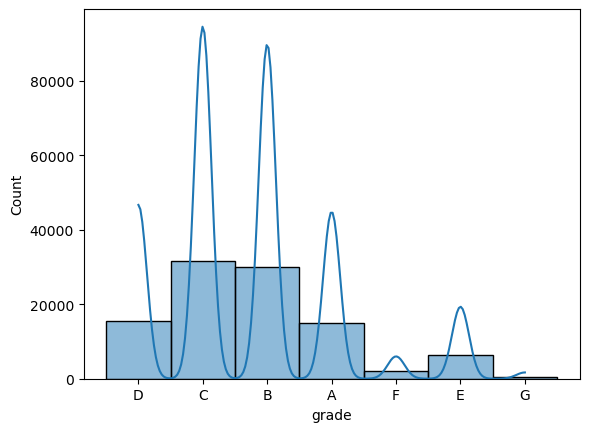

In [15]:
sb.histplot(df['grade'], kde=True)

In [67]:
gradeCloumnDummy=pd.get_dummies(df['grade'])
df = pd.concat((df, gradeCloumnDummy), axis=1)

In [68]:
df.head()

,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,A,B,C,D,E,F,G
loan_amnt,,,,,,,,,,,,,,,,,,,,,
2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,1.0,2.0,...,74.0,351452.0,10800.0,0,0,0,1,0,0,0
12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,0.0,0.0,...,0.0,18207.0,20600.0,0,0,1,0,0,0,0
16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,1.0,0.0,...,0.0,12293.0,7800.0,0,0,0,1,0,0,0
22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,19.08,1.0,0.0,...,250.0,571244.0,53800.0,0,0,1,0,0,0,0
19000,16.99,472.10,D,1 year,RENT,65000.0,Charged Off,15.66,0.0,1.0,...,234.0,13167.0,24600.0,0,0,0,1,0,0,0


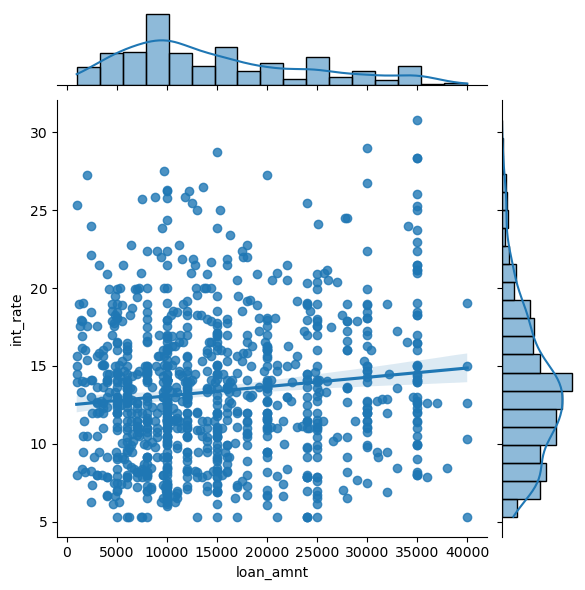

In [23]:
%matplotlib inline
df_sample = df.sample(n=1000, random_state=42)
sb.jointplot(data=df_sample, x='loan_amnt', y='int_rate', kind = 'reg')

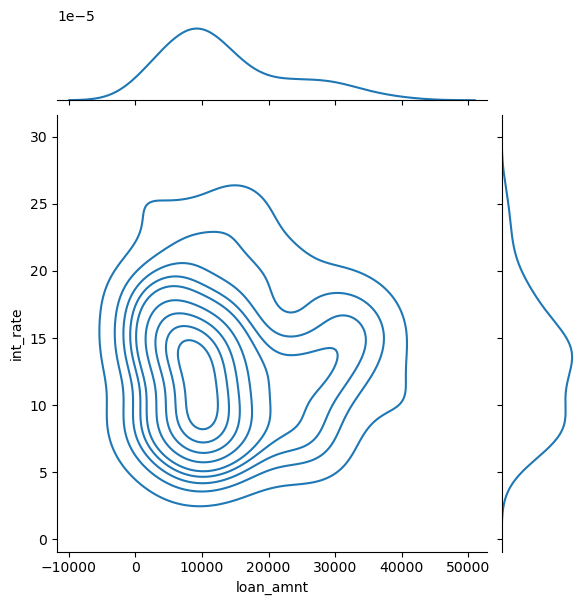

In [19]:
import pandas as pd
import seaborn as sb
df = pd.read_csv('data.csv')
%matplotlib inline
df_sample = df.sample(n=100, random_state=42)
g = sb.jointplot(
    data=df_sample,
    x="loan_amnt", y="int_rate", kind="kde")

In [48]:
df = pd.read_csv('data.csv')
new_df = df[['grade','loan_amnt','int_rate']].copy()
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
new_df['grade'] = new_df['grade'].map(grade_mapping)
print(new_df)

        grade  loan_amnt  int_rate
0         4.0       2000     17.97
1         3.0      12000     12.29
2         4.0      16000     19.42
3         3.0      22525     16.02
4         4.0      19000     16.99
...       ...        ...       ...
100891    4.0      11250     16.99
100892    4.0      14400     15.61
100893    4.0      35000     21.85
100894    1.0      12000      8.90
100895    2.0      20000      8.24

[100896 rows x 3 columns]


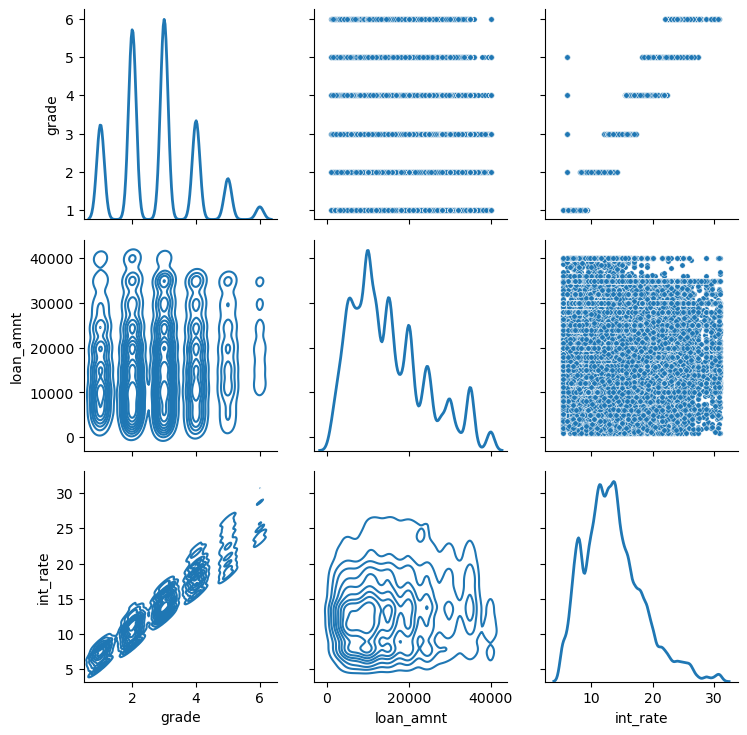

In [52]:
new_df_sample = new_df.sample(n=100, random_state=42)
g = sb.PairGrid(new_df[['grade','loan_amnt','int_rate']], diag_sharey=False)
g.map_upper(sb.scatterplot, s=15)
g.map_lower(sb.kdeplot)
g.map_diag(sb.kdeplot, lw=2)

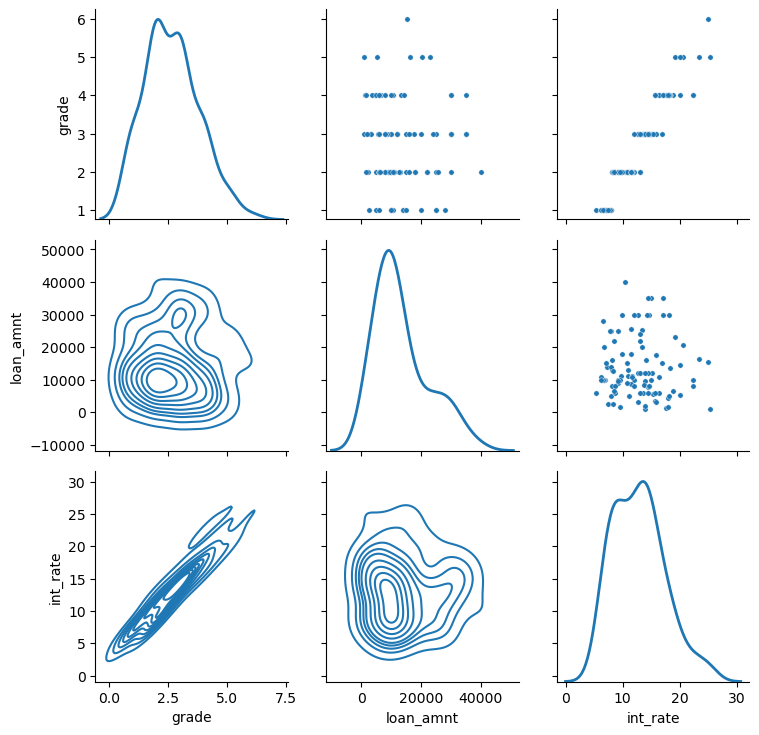

In [57]:
df_sample = new_df.sample(n=100, random_state=42)
g = sb.PairGrid(df_sample[['grade','loan_amnt','int_rate']], diag_sharey=False)
g.map_upper(sb.scatterplot, s=15)
g.map_lower(sb.kdeplot)
g.map_diag(sb.kdeplot, lw=2)

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('Data.csv')
train, test = train_test_split(df, test_size=0.3, random_state=42)
print(df)

        loan_amnt  int_rate  installment grade emp_length home_ownership  \
0            2000     17.97        72.28     D    4 years       MORTGAGE   
1           12000     12.29       400.24     C  10+ years            OWN   
2           16000     19.42       589.90     D    7 years           RENT   
3           22525     16.02       548.01     C  10+ years       MORTGAGE   
4           19000     16.99       472.10     D     1 year           RENT   
...           ...       ...          ...   ...        ...            ...   
100891      11250     16.99       401.04     D  10+ years       MORTGAGE   
100892      14400     15.61       503.50     D    3 years           RENT   
100893      35000     21.85       963.68     D   < 1 year       MORTGAGE   
100894      12000      8.90       381.04     A   < 1 year            OWN   
100895      20000      8.24       628.95     B  10+ years           RENT   

        annual_inc         loan_status    dti  delinq_2yrs  ...  \
0          55400.0  

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data.csv')
df.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,1.0,...,0.0,0.00,0.0000,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
1,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,0.0,...,0.0,0.00,0.0000,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
2,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,1.0,...,0.0,0.00,0.0000,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
3,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,19.08,1.0,...,0.0,0.00,0.0000,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0
4,19000,16.99,472.10,D,1 year,RENT,65000.0,Charged Off,15.66,0.0,...,0.0,1863.64,335.4552,472.10,0.0,Individual,0.0,234.0,13167.0,24600.0


In [4]:
X =df.iloc[:,:-1].values
y =df.iloc[:,:1].values

In [5]:
X

array([[2000, 17.97, 72.28, ..., 0.0, 74.0, 351452.0],
       [12000, 12.29, 400.24, ..., 0.0, 0.0, 18207.0],
       [16000, 19.42, 589.9, ..., 0.0, 0.0, 12293.0],
       ...,
       [35000, 21.85, 963.68, ..., 0.0, 0.0, 217083.0],
       [12000, 8.9, 381.04, ..., 0.0, 0.0, 26386.0],
       [20000, 8.24, 628.95, ..., 0.0, 0.0, 19428.0]], dtype=object)

In [6]:
y

array([[ 2000],
       [12000],
       [16000],
       ...,
       [35000],
       [12000],
       [20000]], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=0)

In [8]:
X_train, X_test, y_train, y_test 

(array([[6375, 5.32, 191.99, ..., 0.0, 0.0, 8081.0],
        [12000, 13.99, 279.16, ..., 0.0, 0.0, 83376.0],
        [4200, 13.98, 143.51, ..., 0.0, 0.0, 14189.0],
        ...,
        [10750, 15.1, 373.18, ..., 0.0, 0.0, 25187.0],
        [22000, 6.49, 674.18, ..., 0.0, 0.0, 25250.0],
        [17000, 12.74, 570.68, ..., 0.0, 0.0, 29273.0]], dtype=object),
 array([[10000, 13.67, 340.18, ..., 0.0, 0.0, 10572.0],
        [5000, 10.42, 162.33, ..., 0.0, 0.0, 19383.0],
        [5000, 14.65, 172.48, ..., 0.0, 0.0, 42985.0],
        ...,
        [18000, 7.26, 557.94, ..., 0.0, 0.0, 604240.0],
        [24000, 26.3, 722.84, ..., 0.0, 0.0, 65992.0],
        [11000, 9.16, 350.62, ..., 0.0, 0.0, 184081.0]], dtype=object),
 array([[ 6375],
        [12000],
        [ 4200],
        ...,
        [10750],
        [22000],
        [17000]], dtype=int64),
 array([[10000],
        [ 5000],
        [ 5000],
        ...,
        [18000],
        [24000],
        [11000]], dtype=int64))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100896 entries, 0 to 100895
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   100896 non-null  int64  
 1   int_rate                    100896 non-null  float64
 2   installment                 100896 non-null  float64
 3   grade                       100896 non-null  object 
 4   emp_length                  100896 non-null  object 
 5   home_ownership              100896 non-null  object 
 6   annual_inc                  100896 non-null  float64
 7   loan_status                 100896 non-null  object 
 8   dti                         100896 non-null  float64
 9   delinq_2yrs                 100896 non-null  float64
 10  inq_last_6mths              100896 non-null  float64
 11  mths_since_last_delinq      100896 non-null  float64
 12  open_acc                    100896 non-null  float64
 13  pub_rec       

In [10]:
cols_to_drop = ['grade','emp_length','home_ownership','loan_status','application_type']
df = df.drop(cols_to_drop,axis=1)

In [11]:
df.head(3)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,2000,17.97,72.28,55400.0,10.62,1.0,2.0,21.0,10.0,0.0,...,83.95,0.0,0.0,0.0,72.28,0.0,0.0,74.0,351452.0,10800.0
1,12000,12.29,400.24,60000.0,17.92,0.0,0.0,33.0,14.0,0.0,...,485.96,0.0,0.0,0.0,11281.15,0.0,0.0,0.0,18207.0,20600.0
2,16000,19.42,589.90,64000.0,3.90,1.0,0.0,16.0,5.0,0.0,...,2303.08,0.0,0.0,0.0,589.90,0.0,0.0,0.0,12293.0,7800.0


<Axes: >

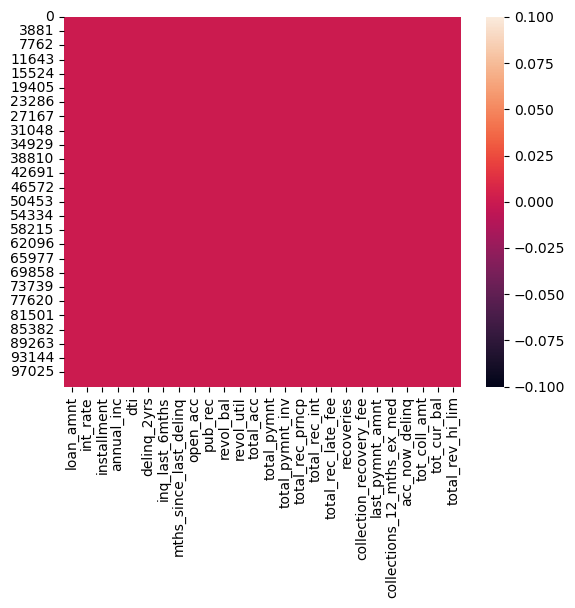

In [12]:
import seaborn as sb
sb.heatmap(df.isnull())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100896 entries, 0 to 100895
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   100896 non-null  int64  
 1   int_rate                    100896 non-null  float64
 2   installment                 100896 non-null  float64
 3   annual_inc                  100896 non-null  float64
 4   dti                         100896 non-null  float64
 5   delinq_2yrs                 100896 non-null  float64
 6   inq_last_6mths              100896 non-null  float64
 7   mths_since_last_delinq      100896 non-null  float64
 8   open_acc                    100896 non-null  float64
 9   pub_rec                     100896 non-null  float64
 10  revol_bal                   100896 non-null  int64  
 11  revol_util                  100896 non-null  float64
 12  total_acc                   100896 non-null  float64
 13  total_pymnt   

In [14]:
X =df.values
y =df['loan_amnt'].values

In [15]:
X =np.delete(X,1,axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
#random foreset calssifier 
from sklearn import ensemble
rf_clf=ensemble.RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7587630909511381

In [18]:
# Define the target variable
y       = df['loan_amnt'].values.reshape(-1,1)

# Define the predictors (all columns except the target variable)
X       = df.loc[:, df.columns != 'loan_amnt']

In [19]:
import numpy as np

test_size = 0.30 
insample  = int(np.size(X,axis=0)*test_size)

# Split in-sample vs out-of-sample observations 

X_train = X[0:insample]
y_train = y[0:insample]
X_test  = X[insample+1:]
y_test  = y[insample+1:]

In [20]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)

y_pred_dt = dtree.predict(X_test)

In [21]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[231,   0,   4, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  0,   0,   4, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0, 742]], dtype=int64)

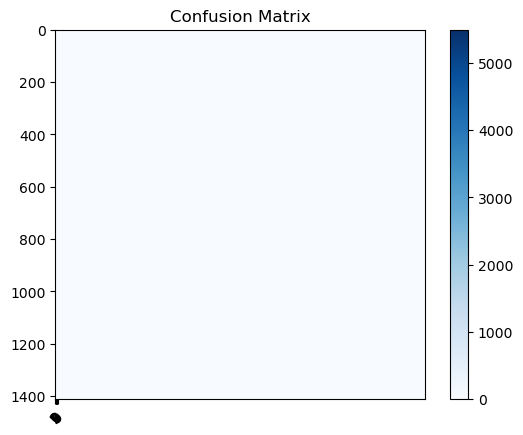

In [44]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure()
plt.imshow(confusion_matrix(y_test, y_pred), cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

# Reduce the number of ticks on the x-axis
plt.xticks(np.arange(10), rotation=45)

# Show the plot
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor
y_train_flat = y_train.ravel()
rf = RandomForestRegressor().fit(X_train, y_train_flat)

y_pred_rf = rf.predict(X_test)

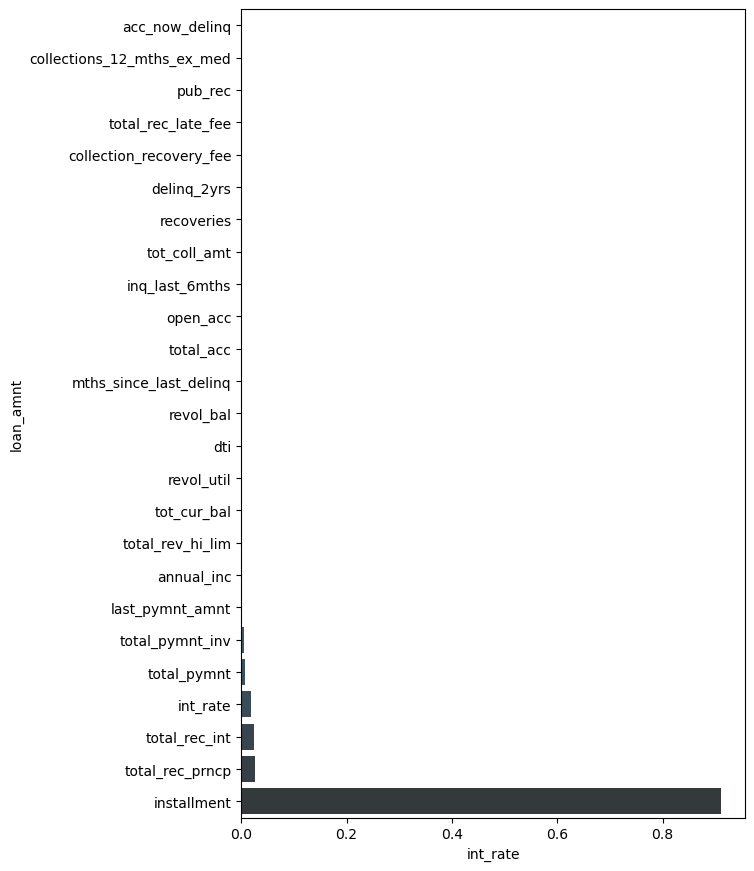

In [29]:
# Extract the names of the predictors
feature_names = X.columns

# Extract the features importance
tree_feature_importances = rf.feature_importances_

# Sort the importance in ascending order
sorted_idx = tree_feature_importances.argsort()

# Create a dataframe with the results
df_1 = np.array([feature_names[sorted_idx], tree_feature_importances[sorted_idx]]).T
df_1         = pd.DataFrame(df_1)
df_1.columns = ['loan_amnt','int_rate']
df_1.index   = feature_names[sorted_idx]

import seaborn as sns
import matplotlib.pyplot as plt

y_ticks = np.arange(0, len(feature_names))
fx, ax = plt.subplots(figsize=(6.5,10.5))
ax = sns.barplot(x="int_rate", y="loan_amnt", data = df_1, palette = 'Blues_d')

In [30]:
#Estimate a boosted regression tree
from sklearn.ensemble import GradientBoostingRegressor

gbr        = GradientBoostingRegressor().fit(X_train, y_train_flat)

y_pred_gbr = gbr.predict(X_test)

In [31]:
#Compare the out-of-sample  𝑅2
from sklearn.metrics import r2_score

r2_dtree   = round(r2_score(y_test, y_pred_dt),2)
r2_rf      = round(r2_score(y_test, y_pred_rf),2)
r2_gbr     = round(r2_score(y_test, y_pred_gbr),2)

print([r2_dtree, r2_rf, r2_gbr])

[0.97, 0.99, 0.97]


In [32]:
#estimate a regression tree
import pandas as pd 
import numpy as np
import seaborn as sb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Let assume we want to split the training sample in five consequent validation periods. 

ts_cv = TimeSeriesSplit(n_splits=5)

dtree = DecisionTreeRegressor(max_features='auto')

# Define params_dt
params_dt = {'max_depth': [2,3,4,6,10],
             'min_samples_leaf': [0.1, 0.2, 0.3]}

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
dt_cv = GridSearchCV(estimator=dtree,
                       param_grid=params_dt,
                       scoring='neg_mean_absolute_error',
                       cv=ts_cv,
                       verbose=1,
                       n_jobs=-1)

dt_cv.fit(X_train, y_train)

y_dt_cv_pred = dt_cv.predict(X_test)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [33]:
# Let's first create the set of parameters that needs to be calibrated
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 20, 40]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [34]:
from sklearn.ensemble import RandomForestRegressor

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using time splits, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = ts_cv, verbose=2, random_state=2, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [10, 20, 40],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=2, verbose=2)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


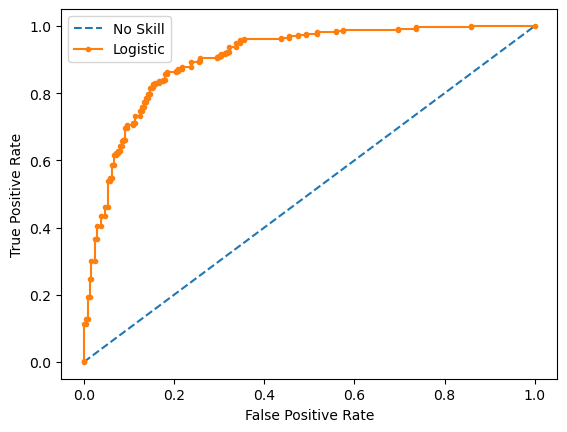

In [37]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.841 auc=0.898


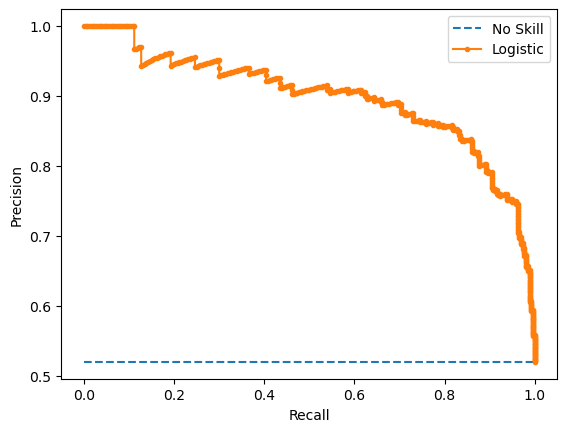

In [15]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()